In [10]:
# pip install numpy
# pip install scikit-learn
# pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt


Accuracy: 0.9416666666666667


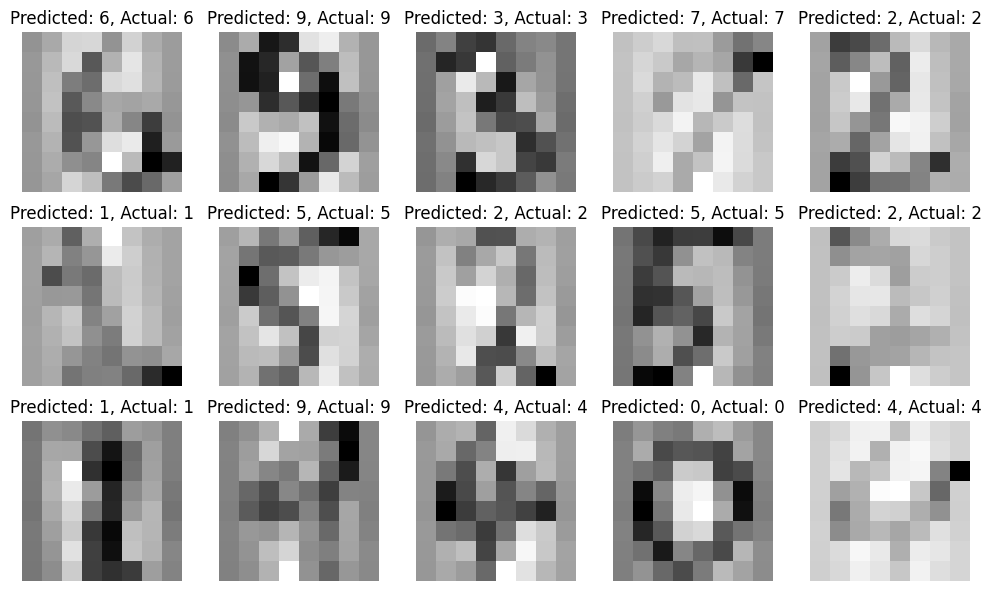

In [16]:
# Load the dataset
digits = load_digits()
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the perceptron using OneVsRestClassifier for multi-class classification
perceptron = OneVsRestClassifier(SklearnPerceptron(max_iter=1000, tol=1e3, eta0=0.01))
perceptron.fit(X_train, y_train)
# Make predictions on the test set
predictions = perceptron.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# Plot some of the test digits along with their predictions
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()